<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data_new.xlsx'

In [4]:
df = pd.read_excel(path)
df.head(20)

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock
0,1,23,F,150,1,Satisfied with the service,Clothing,4
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86
2,3,45,F,800,0,Regular customer,Books,24
3,4,52,M,200,0,Occasional buyer,Beauty,10
4,5,29,F,300,1,High spender,Books,47
5,6,41,M,450,0,Average experience,Books,86
6,7,38,F,670,1,Prefers online shopping,Home Goods,69
7,8,27,M,120,1,New customer,Home Goods,0
8,9,50,F,500,0,Loyal to the brand,Electronics,86
9,10,33,M,750,1,High conversion rate,Clothing,45


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df[['Age', 'Total Spent']]
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf= RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Feature Importances from Random Forest:")
print(feature_importances)

Feature Importances from Random Forest:
             Importance
Age            0.526391
Total Spent    0.473609


In [13]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['Scaled_Total_Spent', 'Scaled_Age']] = scaler.fit_transform(df[['Total Spent', 'Age']])

lof = LocalOutlierFactor(n_neighbors=5)
df['LOF_Score'] = lof.fit_predict(df[['Scaled_Total_Spent', 'Scaled_Age']])
outliers_lof = df[df['LOF_Score'] == -1]
print("LOF Outliers:")
print(outliers_lof[['Customer ID', 'Age', 'Total Spent']])

LOF Outliers:
Empty DataFrame
Columns: [Customer ID, Age, Total Spent]
Index: []


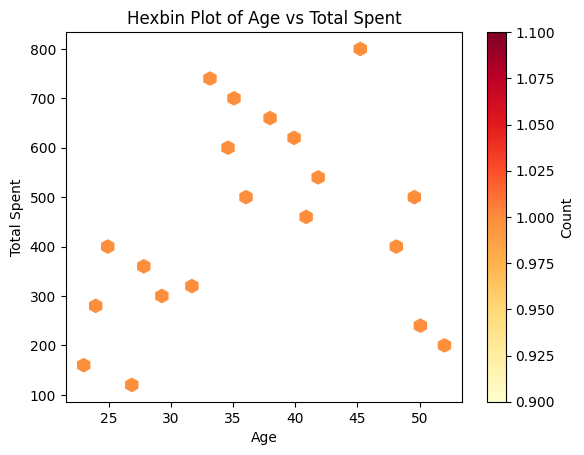

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hexbin(df['Age'], df['Total Spent'], gridsize=30, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.title('Hexbin Plot of Age vs Total Spent')
plt.show()

In [16]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Model Accuracy:", xgb_model.score(X_test, y_test))

XGBoost Model Accuracy: 0.8333333333333334


In [17]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Converted'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 0.0, p-value: 1.0


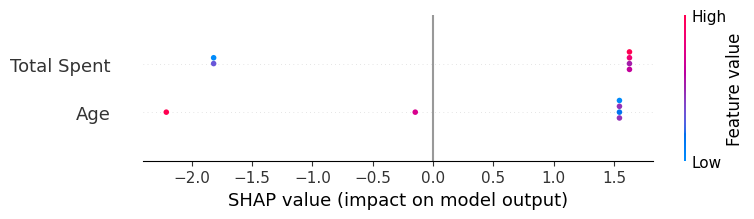

In [18]:
import shap


explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [19]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df[['Scaled_Total_Spent', 'Scaled_Age']])
print("GMM Cluster Labels:")
print(df['GMM_Cluster'].value_counts())

GMM Cluster Labels:
GMM_Cluster
1    9
0    7
2    4
Name: count, dtype: int64


In [20]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print(f"Ridge Regression Coefficients: {ridge.coef_}")

Ridge Regression Coefficients: [-0.02091133  0.00053699]


In [25]:
!pip install scikit-learn==0.24.2
from sklearn.inspection import plot_partial_dependence


plot_partial_dependence(xgb_model, X_train, ['Age'])
plt.title('Partial Dependence of Age')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 49.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/usr/local/lib/python3.10/dist-packages/sklearn/inspection/__init__.py)

In [26]:
from sklearn.metrics import roc_auc_score

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score for XGBoost Model")

ROC AUC Score for XGBoost Model
